<a href="https://colab.research.google.com/github/SarahWohlford/SW_Projects-in-Machine-Learning-and-AI_P/blob/main/SW_HW1_Proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Homework 1

### 1.1)
Derive the objective function for Logistic Regression using Maximum Likelihood
Estimation (MLE). Do some research on the MAP technique for Logistic Regression,
include your research on how this technique is different from MLE (include citations).

Start:  likelihood $$(x_i, y_i) \in \mathbb{R}^d \times \{0, 1\}:$$

$$
p(y_i \mid x_i, w) = [\sigma(w^\top x_i)]^{y_i} [1 - \sigma(w^\top x_i)]^{1 - y_i}, \quad \sigma(z) = \frac{1}{1 + e^{-z}}
$$

n independent and identically distributed samples log likelihood:

$$
L(w) = \sum_{i=1}^n \left[ y_i \log \sigma(w^\top x_i) + (1 - y_i) \log (1 - \sigma(w^\top x_i)) \right]
$$

Negative log likelihood:
Maximizing \(L(w)\) = minimizing the negative log likelihood:

$$
J_{\text{MLE}}(w) = -L(w) = \sum_{i=1}^n \log \left(1 + e^{-y_i w^\top x_i} \right)
$$


MLE: treats the weights \(w\) as unknown but fixed, and maxs the data likelihood.

MAP: combines data with prior belief: places a prior \(p(w)\) on the weights and maxs the posterior:



MAP = MLE + L2 regularization
This helps improve generalization when data is limited or features are collinear.

**Sources:**
https://www.geeksforgeeks.org/ml-linear-regression/
https://zstevenwu.com

### 1.2)
Define a machine learning problem you wish to solve using Logistic Regression. Justify why logistic regression is the best choice and compare it briefly to another linear classification model (cite your work if this other technique was not covered in class)

My data set choosen for this home work is a set of 1000 students and different factors like study_hours_per_day. Goal = to predict whether a student will pass or fail based on input on the data

Try to predict if a student will pass or fail based on data:
- age
- gender
- study_hours_per_week
- social_media_hours_per_week
- netfix_hours
- part_time_job
- attendace_percentage
- sleep_hours
- diet_quality
- exercise_frequency
- parental_education_level
- internet_quality
- mental_health_rating
- extracurricular_participation

See if pass or fail
- exam_score

Why Logistic Regression works with this task
- Reaserch said that logistic regression is good for models with binary outputs which this is:
- Data directly show impact on odds of passing --> only two options pass or fail
- Models probability that a student will pass --> allows for clear decision making
- The output is interpretable --> can see how each feature increases or decreases a students odds of passing
- Seems to work well with small/medium data sets


 Comparison Support Vector Machine (SVM):
About: SVMs find a boundary that maximizes the margin between classes.
They work well for both linear and non-linear classification.

Why its a bad choice: it is less interpretable --> do not give direct probabilities, harder to understand results, is more sensitive to outliers, dos not scale as easily for probabilistic outputs. Its better for huge data sets however I am not using a huge data set.

Logistic Regression is better for this prablem because of its interpretability, probabilistic output, and efficiency that is good enough for my not huge data set.

**Sources cont**
https://medium.com/@karan.kamat1406/which-classification-model-should-you-use-a-cheat-sheet-for-machine-learning-practitioners-3fea0bcab04e

https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

https://scikit-learn.org/stable/modules/svm.html





### 1.3)
Discuss how your dataset corresponds to the variables in your equations, highlighting any assumptions in your derivation from part 1.


**$x_i \in \mathbb{R}^d$**  
Feature vector for the i-th student.

- Numeric features:  
  age, study_hours_per_day, attendance_percentage, sleep_hours,  
  diet_quality, exercise_frequency, internet_quality, mental_health_rating`

- Categorical features(converted to nmbers later during data processing):  
  gender, part_time_job, parental_education_level, extracurricular_participation


**$y_i \in \{0, 1\}$**  
Binary target: whether the student passed (1) or failed (0).  
We defined:

$$
y_i =
\begin{cases}
1 & \text{if exam_score} \geq 60 \\
0 & \text{otherwise}
\end{cases}
$$

This was implemented during data processing

$w \in \mathbb{R}^d$

Weight vector: Each $w_j$ represents how a +1 increase in the $j$-th feature affects the log-odds of passing.

$\sigma(w^\top x_i)$
Predicted probability that student $i$ will pass, using the sigmoid function:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

$J_{\text{MLE}}(w) = \sum_{i=1}^n \log \left(1 + e^{-y_i w^\top x_i} \right)$
cross-entropy loss

$J_{\text{MAP}}(w) = J_{\text{MLE}}(w) + \frac{\lambda}{2} \lVert w \rVert_2^2$
This adds an Gaussian prior (prevent overfitting)



Overall
Every row in student_habits_performance becomes an $$(x_i, y_i)$$ pair. These plug directly into the Bernoulli likelihood used in logistic regression.  
The assumptions above let us interpret each weight $$w_j$$ as the effect of its features on the student’s probability of passing.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import Normalizer
import warnings
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.optimizers import SGD, RMSprop, Adam

warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

#I dont know if you will need this but this is how I uploaded the data
from google.colab import files
uploaded = files.upload()


data = pd.read_csv("student_habits_performance.csv")

# exam score --> pass/fail target
data['pass_fail'] = np.where(data['exam_score'] >= 60, 1, 0)

# Drop unnecessary columns
data.drop(columns=['student_id', 'exam_score'], inplace=True)

#  categorical features to numbers
data_hold = {
    'diet_quality': {'Poor': 0, 'Fair': 1, 'Good': 2},
    'internet_quality': {'Poor': 0, 'Average': 1, 'Good': 2}
}
data.replace(data_hold, inplace=True)

# Drop rows with missing values just in case
data.dropna(inplace=True)

# Convert expected columns to numeric
numeric_cols = [
    'age', 'study_hours_per_day', 'social_media_hours', 'netflix_hours',
    'attendance_percentage', 'sleep_hours', 'diet_quality',
    'exercise_frequency', 'mental_health_rating', 'internet_quality'
]
for col in numeric_cols:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data.dropna(inplace=True)

# true/false --> 0 and 1 s
data_encoded = pd.get_dummies(data, columns=[
    'gender', 'part_time_job', 'parental_education_level', 'extracurricular_participation'
], drop_first=True)

# Make sure all boolean columns are ints
bool_cols = data_encoded.select_dtypes(include='bool').columns
data_encoded[bool_cols] = data_encoded[bool_cols].astype(int)

# Vif
X = add_constant(data_encoded.drop(columns=['pass_fail']))
vif_data = pd.DataFrame({
    "Feature": X.columns,
    "VIF": [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})
print("VIF")
print(vif_data.sort_values(by="VIF", ascending=False))


Saving student_habits_performance.csv to student_habits_performance (5).csv
VIF
                                 Feature         VIF
0                                  const  229.346735
15       parental_education_level_Master    1.233561
14  parental_education_level_High School    1.227176
11                           gender_Male    1.055702
12                          gender_Other    1.053101
10                  mental_health_rating    1.019142
5                  attendance_percentage    1.018754
9                       internet_quality    1.015919
6                            sleep_hours    1.012481
7                           diet_quality    1.012379
8                     exercise_frequency    1.011214
1                                    age    1.010848
13                     part_time_job_Yes    1.009241
3                     social_media_hours    1.008453
16     extracurricular_participation_Yes    1.008229
2                    study_hours_per_day    1.006830
4                  

Expliantion of Vif: correlation between independent variables

Closer to 1 → smaller effect
all values low most bellow 1.1 and 2 just above 1.2
1 means no correlation and 1-5 is low correlation and none of the values are close to 5
overall this show that all the values have almost none or very low correlation --> no multicollinearity concerns

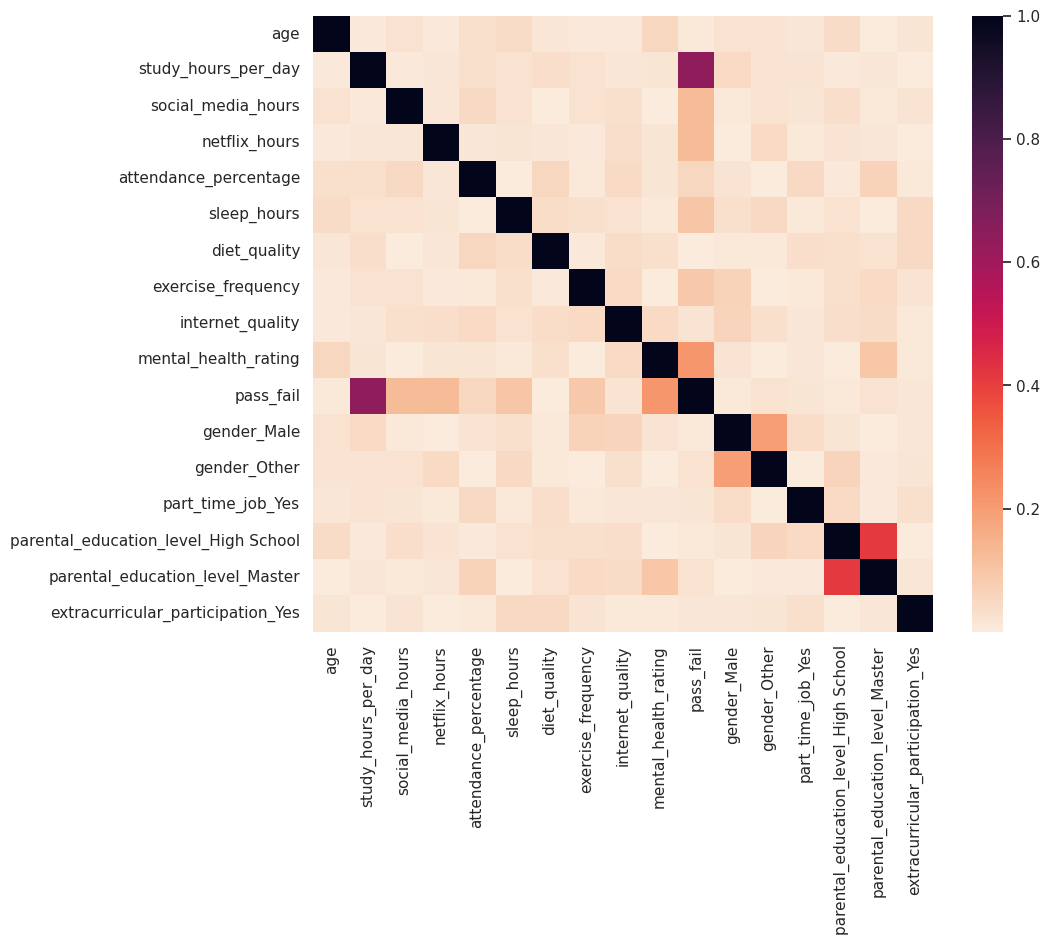

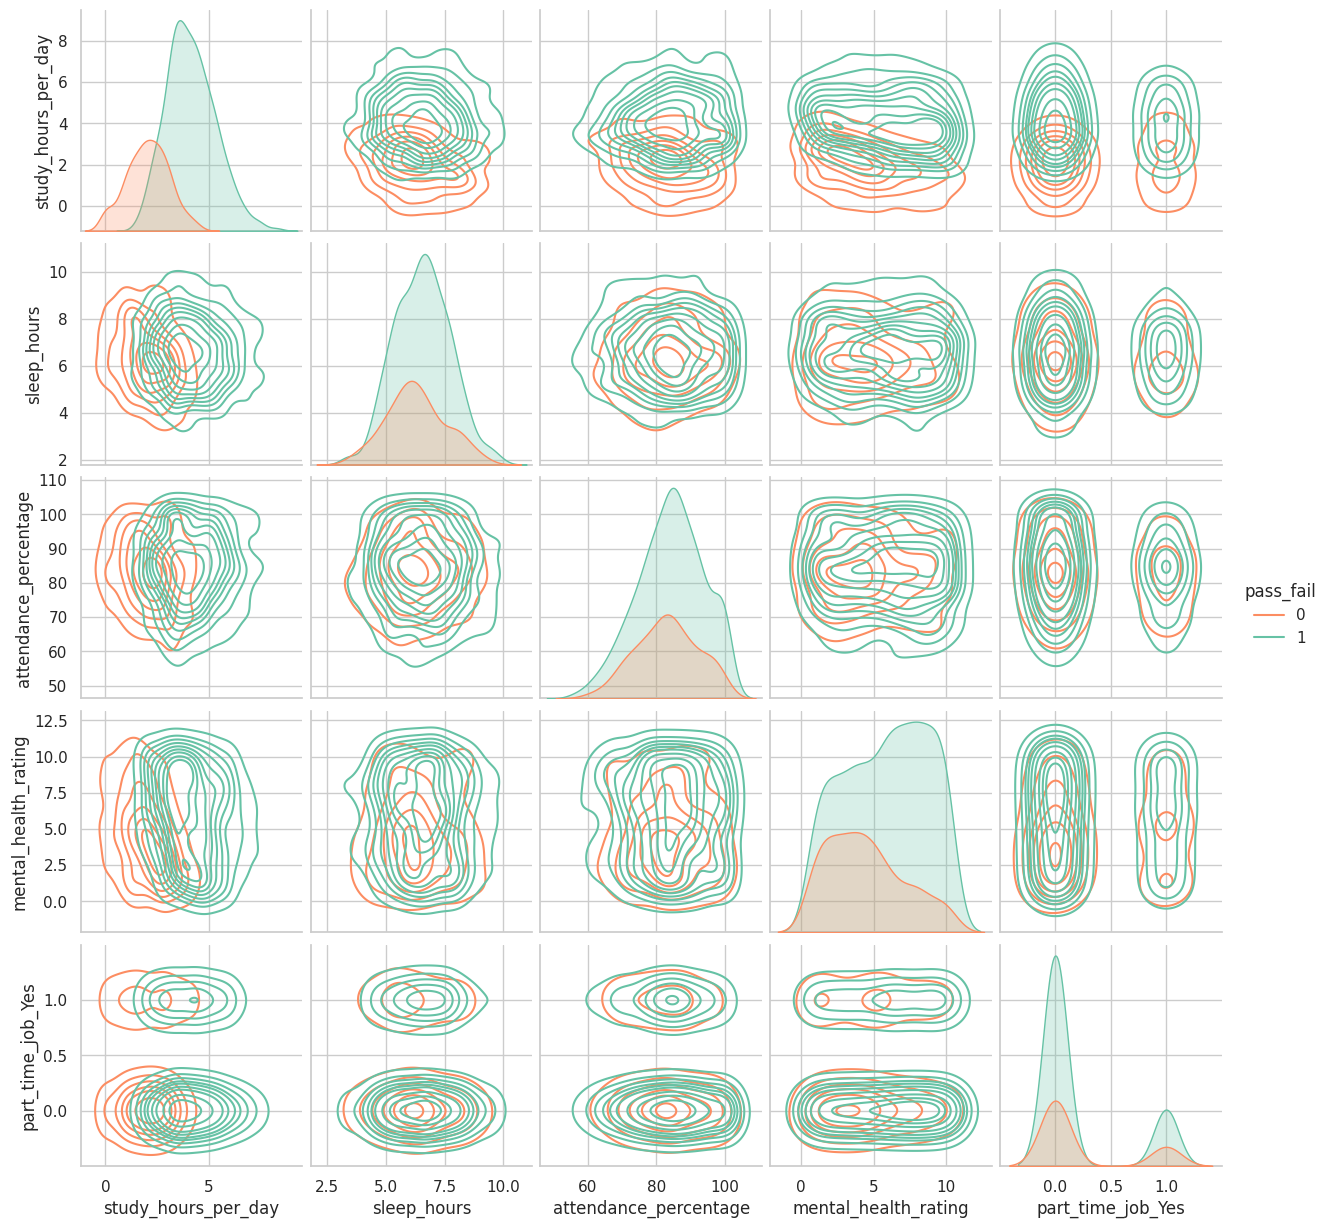

In [ ]:
# visulization

#heatmap
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(data_encoded.corr().abs(),annot=False, ax=ax, cmap='rocket_r')

#pair plot (not all features)
selected_features = [
    'study_hours_per_day', 'sleep_hours',
    'attendance_percentage', 'mental_health_rating',
    'part_time_job_Yes', 'pass_fail'
]

# color for pass/fail (I wanted green to be pass and red to be fail)
palette = {0: '#fc8d62', 1: '#66c2a5'}

sns.pairplot(data_encoded[selected_features], hue='pass_fail', kind='kde', palette=palette)
plt.suptitle("", y=1.02, fontsize=14)
plt.show()

Analysis of visualizations:
- study_hours_per_day has the strongest effect by far on impacting weather a person passes or fails
- Other factors like social_media_hours_per_day and netflex_hours_per_day also have and effect on pass_fail
- Studying more hours per day averages a higher pass rate --> from 2nd vislization people who pass study more hours per day it also stands out on the heat map
- More netfex and social media hours has a negative effect on pass_fail
- In second image(first box) can clearly see that people who studied for more hours passed the exam more than those who had low study hours
- Only other factor from that image that looked like it had an impact on passing was mental_health_rating more students with a higher mental health rating passed The green (passed) bulges in the higher mental health rating while red (failed) bulges in the lower mental health rating.

### 3.1)

Implement Logistic Regression from scratch, including the vectorized implementation of cost function and gradient descent.


In [ ]:
# Logistic Regression

# Sigmoid function: σ(a) = 1 / (1 + e^(-a))
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Compute loss
# Implements: L = -(1/m) ∑ [y log(ŷ) + (1 - y) log(1 - ŷ)]
def compute_loss(X, y, w, b):
    n = X.shape[0]
    #A = sigmoid(np.dot(w.T,X) + b)
    A = sigmoid(np.dot(X, w) + b)
    #Loss=-1/n * np.sum(Y * np.log(A) + (1-Y) * (np.log(1-A)))
    loss = - (1/n) * np.sum(y*np.log(A) + (1-y)*np.log(1-A))
    return loss

# Compute gradients
# ∂L/∂w = (1/n) * X^T(A - Y)
# ∂L/∂b = (1/n) * ∑(A - Y)
def compute_gradients(X, y, w, b):
    n = X.shape[0]
    A = sigmoid(np.dot(X, w) + b)  # Predicted probabilities
    #dw = np.dot(X, (A-Y).T)/n
    dw = (1/n) * np.dot(X.T, (A-y))
    #db= np.sum(A-Y)/n
    db = (1/n) * np.sum(A-y)
    return dw, db

# Gradient Descent:
#You basically need to write down two steps and iterate through them for the entire dataset:
# 1) Calculate the cost and the gradient for the current parameters.
# 2) Update the parameters using gradient descent rule for w and b.

def gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    n_features = X.shape[1]
    w = np.zeros((n_features, 1))  # Initialize weights
    b = 0                          # Initialize bias
    cost_history = []

    for i in range(num_iterations):
        dw, db = compute_gradients(X, y, w, b)
        #w = w - learning_rate*dw
        w = w-learning_rate * dw
        #b= b - learning_rate*db
        b = b - learning_rate * db
    return w, b, cost_history

# Prediction:
# Computes A = σ(w^T X + b), then threshold A > 0.5
def predict(X, w, b):
    A = sigmoid(np.dot(X, w) + b)
    return (A > 0.5).astype(int)

#prep data
X = data_encoded.drop(columns=['pass_fail']).values
y = data_encoded['pass_fail'].values.reshape(-1, 1)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#use gradient decent
w, b, cost_history = gradient_descent(X_train, y_train, learning_rate=0.1, num_iterations=1000)
#use predictions
y_pred_test = predict(X_test, w, b)

final_loss = compute_loss(X_train, y_train, w, b)

#acuracy and print
test_acc = accuracy_score(y_test, y_pred_test)
print(f"Accuracy: {test_acc:.4f}")
print(f"Loss: {final_loss:.4f}")




Accuracy: 0.8956
Loss: 0.1706


3.1) Results explaination:

Pretty high accuracy can correctly tell if a student will pass based on the data 0.89% of the time

Loss functon --> how well the predictions match pass/fail labels
Low loss number: so the predicted probabilities are strong and accurate

### 3.2)

Implement and compare the three gradient descent variants (e.g., batch gradient
descent, stochastic gradient descent, and mini-batch gradient descent). Explain their convergence properties with respect to your cost function.

source: https://www.geeksforgeeks.org/difference-between-batch-gradient-descent-and-stochastic-gradient-descent/

https://www.geeksforgeeks.org/mini-batch-gradient-descent-in-deep-learning/

In [ ]:
#from class artical
# Batch Gradient Descent: computes the gradient of the cost function using the
# entire training dataset for each iteration. This approach ensures that the
# computed gradient is precise, but it can be computationally expensive when
# dealing with very large datasets.
def batch_gradient_descent(X, y, learning_rate=0.01, num_iterations=1000):
    n_features = X.shape[1]
    w = np.zeros((n_features, 1))
    b = 0
    cost_hold = []
    for i in range(num_iterations):
        dw, db = compute_gradients(X, y, w, b)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        cost_hold.append(compute_loss(X, y, w, b))
    return w, b, cost_hold

#from class artical
# Stochastic Gradient Descent: addresses the inefficiencies of Batch Gradient
# Descent by computing the gradient using only a single training example
# (or a small subset) in each iteration. This makes the algorithm much faster
# since only a small fraction of the data is processed at each step.
def stochastic_gradient_descent(X, y, learning_rate=0.01, num_epochs=10):
    n, d = X.shape
    w = np.zeros((d, 1))
    b = 0
    cost_hold = []
    for epoch in range(num_epochs):
        for i in range(n):
            xi = X[i].reshape(1, -1)
            yi = y[i].reshape(1, -1)
            A = sigmoid(np.dot(xi, w) + b)
            dw = np.dot(xi.T, (A - yi))
            db = A - yi
            w = w - learning_rate * dw
            b = b- learning_rate * db
        cost = compute_loss(X, y, w, b)
        cost_hold.append(cost)
    return w, b, cost_hold

#from class artical
# Mini-Batch Gradient Descent: a variant of the traditional gradient descent
# algorithm used to optimize the parameters i.e weights and biases of a neural
# network. It divides the training data into small subsets called mini-batches
# allowing the model to update its parameters more frequently compared to using
# the entire dataset at once.
def mini_batch_gradient_descent(X, y, batch_size=16, learning_rate=0.01, num_hold=50):
    n, d = X.shape
    w = np.zeros((d, 1))
    b = 0
    cost_hold = []
    for num in range(num_hold):
        indices = np.random.permutation(n)
        X_shuffled = X[indices]
        y_shuffled = y[indices]
        for i in range(0, n, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]
            dw, db = compute_gradients(X_batch, y_batch, w, b)
            w = w - learning_rate * dw
            b = b - learning_rate * db
        cost = compute_loss(X, y, w, b)
        cost_hold.append(cost)
    return w, b, cost_hold

# Run all
w_batch, b_batch, cost_batch = batch_gradient_descent(X_train, y_train, learning_rate=0.1)
w_sgd, b_sgd, cost_sgd = stochastic_gradient_descent(X_train, y_train, learning_rate=0.01)
w_mini, b_mini, cost_mini = mini_batch_gradient_descent(X_train, y_train, batch_size=16, learning_rate=0.05)

# Predictions
y_pred_test_batch = predict(X_test, w_batch, b_batch)
y_pred_test_sgd = predict(X_test, w_sgd, b_sgd)
y_pred_test_mini = predict(X_test, w_mini, b_mini)

# Accuracy
acc_batch = accuracy_score(y_test, y_pred_test_batch)
acc_sgd = accuracy_score(y_test, y_pred_test_sgd)
acc_mini = accuracy_score(y_test, y_pred_test_mini)

acc_batch, acc_sgd, acc_mini, cost_batch, cost_sgd, cost_mini

results = (acc_batch, acc_sgd, acc_mini, cost_batch, cost_sgd, cost_mini)
print("              | Accuracy         | Cost")
print("---------------------------------------------")
print(f"Batch         | {acc_batch:.6f}         | {cost_batch[-1]:.6f}")
print(f"Stochastic    | {acc_sgd:.6f}         | {cost_sgd[-1]:.6f}")
print(f"Mini-batch    | {acc_mini:.6f}         | {cost_mini[-1]:.6f}")


              | Accuracy         | Cost
---------------------------------------------
Batch         | 0.895604         | 0.170571
Stochastic    | 0.890110         | 0.179076
Mini-batch    | 0.890110         | 0.167535


3.2) Explain the results:

- Batch has a little higher accuracy than stochastic and tied with mini batch it also has the 2nd lowest cost: using the full data set at each update lead to highest accuracy
- Mini batch has the lowest cost and tied for highest accuracy: might fit data better, has same accuracy as batch. It balances being fast and accurate by useing smaller batches of data
- Stochastic is the worst: it has the highest cost and lowest accuracy: updates weights after each individual sample --> more noise during so its slower and less stable


Compare the 3

Batch Gradient Descent uses the entire training dataset to compute the gradient in each update step. This makes the learning process more stable because the direction of weight updates is accurate. However, it might be slow with large data sets because it needs to process all the data before making each update. Even though its slower, batch gradient descent worked well on my smaller data set.

Stochastic Gradient Descent updates the weights using only one training example at a time --> makes it faster to update and lets it learn quickly. However, because it uses just one data point per step, the updates can be noisy and can bounce around. It may not reach the exact minimum of the cost function but usually gets close enough. So its good for large datasets. My data set was not that big so this was not the best.

Mini-Batch Gradient Descent finds a good balance between batch and SGD by using a small batch of data for each update. It combines the speed of SGD with the stability of batch gradient descent. This method reduces the noise seen in SGD and speeds up the learning compared to full batch updates. Because of this, mini-batch gradient descent is good for large datasets. This worked well for my data set even though it was not huge.

### 4.1)

Implement or use packages to incorporate any three optimization algorithms (e.g., Momentum, RMSProp, Adam). Compare their performance with the vanilla stochastic gradient descent implementation from Task 3.

In [ ]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
    ])
    return model
def train_optimizer(optimizer, epochs=50):
    model = create_model()
    model.compile(optimizer=optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=epochs, verbose=0)
    return model, history.history['loss']

# Define optimizers
opt_momentum = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
opt_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.01)
opt_adam = tf.keras.optimizers.Adam(learning_rate=0.01)

# Train
w_momentum, hist_momentum = train_optimizer(opt_momentum)
w_rmsprop, hist_rmsprop = train_optimizer(opt_rmsprop)
w_adam, hist_adam = train_optimizer(opt_adam)

def predict_binary(model, X):
    probs = model.predict(X)
    return (probs >= 0.5).astype(int)

# Predictions
y_pred_momentum = predict_binary(w_momentum, X_test)
y_pred_rmsprop = predict_binary(w_rmsprop, X_test)
y_pred_adam = predict_binary(w_adam, X_test)

# Accuracy
acc_momentum = accuracy_score(y_test, y_pred_momentum)
acc_rmsprop = accuracy_score(y_test, y_pred_rmsprop)
acc_adam = accuracy_score(y_test, y_pred_adam)

print("             | Cost       | Accuracy")
print("----------------------------------------")
print(f"Stochastic   | {acc_sgd:.4f}      | {cost_sgd[-1]:.4f}")
print(f"Momentum    | {hist_momentum[-1]:.4f}      | {acc_momentum:.4f}")
print(f"RMSProp     | {hist_rmsprop[-1]:.4f}      | {acc_rmsprop:.4f}")
print(f"Adam        | {hist_adam[-1]:.4f}      | {acc_adam:.4f}")

print("")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
             | Cost       | Accuracy
----------------------------------------
Stochastic   | 0.8901      | 0.1791
Momentum    | 0.1679      | 0.8956
RMSProp     | 0.1586      | 0.8901
Adam        | 0.1712      | 0.8956



4.1) explain the results:
Using Stochastic    | 0.890110         | 0.179076  from earlier (accuracy, cost)

- Stochastic: highest cost and tied for lowest accuracy --> worst. Stuggled the most with this problem

- Momentum: 2nd highest cost and tied for lowest accuracy --> 2nd worst. Does reduces cost compared to Stochastic. Has decent acuracy and improves cost but is not the best.

- RMSProp: lowest cost and tied for lowest accuracy --> cost winner: best in terms of minimizing the cost function, so good learning and generalization.

- Adam: 2nd lowest cost and highest acceracy --> accuracy winner: best for accuracy. Balances fast convergence and generalization.

Sources: https://keras.io/getting_started/intro_to_keras_for_engineers/
https://keras.io/api/optimizers/sgd/#:~:text=This%20is%20the%20momentum%20to%20use%20when%20computing,None%2C%20defaults%20to%20None.%20Only%20used%20if%20use_ema%3DTrue.
https://keras.io/api/optimizers/adam/
https://www.tensorflow.org/tutorials/quickstart/beginner

### 4.2)

Define and use multiple evaluation metrics (e.g., precision, recall, F1 score) to analyze and interpret results for each algorithm.

In [ ]:
def evaluate_model(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred)
    }

metrics_sgd = evaluate_model(y_test, y_pred_test)
metrics_momentum = evaluate_model(y_test, y_pred_momentum)
metrics_rmsprop = evaluate_model(y_test, y_pred_rmsprop)
metrics_adam = evaluate_model(y_test, y_pred_adam)

print(f"{'          '} | {'Accuracy'} | {'Precision'} | {'Recall'} | {'F1 Score'}")
print("-" * 60)
for name, metrics in zip(
    ['Stochastic', 'Momentum', 'RMSProp', 'Adam'],
    [metrics_sgd, metrics_momentum, metrics_rmsprop, metrics_adam]
):
    print(f"{name:<10} | {metrics['Accuracy']:.4f}   | {metrics['Precision']:.4f}    | {metrics['Recall']:.4f} | {metrics['F1 Score']:.4f}")



           | Accuracy | Precision | Recall | F1 Score
------------------------------------------------------------
Stochastic | 0.8956   | 0.8889    | 0.9771 | 0.9309
Momentum   | 0.8956   | 0.8889    | 0.9771 | 0.9309
RMSProp    | 0.8901   | 0.8881    | 0.9695 | 0.9270
Adam       | 0.8956   | 0.8889    | 0.9771 | 0.9309


4.2) explain the results:
Stochastic, momentum, and adam tied --> could be different for larger data sets
- Stochastic: Tied lower accuracy and tied higher F1, made more mistakes overall
- Momentum: Better than Stochastic in all categories, high recall, but slightly lower precision
- RMSProp: Worst close to Momentum, high recall and balanced precision
- Adam: highest accuracy, recall, and F1 scor, slightly lower precision than others

- Stochastic: Tied with Momentum and Adam in overall Accuracy, F1 Score, Precision. Despite high Recall, it's not always as stable in convergence, and performance may vary more on larger datasets. *I think this would be worse for larger data sets
- Momentum: Also tied for 1st in all categories. Has a high Recall, meaning it successfully detects most correct positives. In theory Momentum helps smooth out Stochastics path and can help converge faster.
- RMSProp Performed slightly worse than the others in all categories, though still good. Slight drop in F1 Score and Accuracy may be due false positives or problems in my setup.
-Adam: tied for 1st, with top F1 Score and Recall, and tied Accuracy. It combines benefits of Momentum and RMSProp, helping it generalize well and converge faster.

The Slightly lower Precision in all: suggests a few false positives, but the high Recall balances that out, resulting in a strong F1.

### 4.3)

Perform a hyperparameter tuning process (manual or automated using grid search/random search) for each optimization algorithm and assess its impact on
performance. If you have to do some research for these techniques, please cite your sources.

https://www.geeksforgeeks.org/hyperparameter-tuning/

https://builtin.com/articles/hyperparameter-tuning

In [ ]:
#create and train models
def train_and_evaluate(optimizer_fn, lr):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],))
    ])
    # Call the optimizer function
    opt = optimizer_fn(lr)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=50, verbose=0)
    y_pred = (model.predict(X_test) >= 0.5).astype(int)
    return f1_score(y_test, y_pred)

learning_rates = [0.001, 0.01, 0.1]

optimizers = {
    'Stochastic': lambda lr: tf.keras.optimizers.SGD(learning_rate=lr),
    'Momentum  ': lambda lr: tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.9),
    'RMSProp   ': lambda lr: tf.keras.optimizers.RMSprop(learning_rate=lr),
    'Adam      ': lambda lr: tf.keras.optimizers.Adam(learning_rate=lr)
}

results = []

for name, opt_fn in optimizers.items():
    for lr in learning_rates:
        # train_and_evaluate
        f1 = train_and_evaluate(opt_fn, lr)
        results.append((name, lr, f1))

print(f"{'Optimizer'} | {'LR'} | {'F1 Score'}")
print("-" * 30)
for name, lr, f1 in results:
    print(f"{name:} | {lr} | {f1:.4f}")

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Optimizer | LR | F1 Score
------------------------------
Stochastic | 0.001 | 0.6754
Stochastic | 0.01 | 0.9118
Stochastic | 0.1 | 0.9270
Momentum   | 0.001 | 0.9236
Momentum   | 0.01 | 0.9309
Momentum   | 0.1 | 0.9309
RMSProp    | 0.001 | 0.9213
RMSProp    | 0.01 | 0.9270
RMSProp    | 0.1 | 0.9151
Adam       | 0.001 | 0.9051
Adam       | 0.01 | 0.9309
Adam       | 0.1 | 0.9236


4.3) Explain the results I chose different learning rates

- Stochastic: Low LR (0.001) does not well (F1 = 0.6283) super low by far on this list. best is between 0.01-0.1, with 0.1 slightly better
- Momentum: Performs consistently well at all LRs, best at 0.01 with the highest F1 Score overall (0.9348)
- RMSProp: Strong across all LRs, best F1 at 0.1 but difference is small LR does not have strong effect on F1
- Adam: performs well at all LRs, best at 0.01 (F1 = 0.9309). Slight drop at
 0.1, but still high overall Adam is reliable.



### 4.4)

Conclude by discussing the practical trade-offs of the algorithms, including
computational complexity, interpretability, and suitability for large-scale datasets.

1. Stochastic:
Is simpler and fast. Its interpretability is high since it uses the raw gradient and updates parameters straightforwardly. Because it updates based on one sample at a time, the optimization path can be noisy, and convergence is often slow. For large datasets, its computationally efficient per step but may need multiple steps before it gets a solution.

2. Momentum: Based on artical from class "Momentum is a method that helps accelerate SGD in the relevant direction and dampens oscillations. It does this by adding a fraction of the update vector of the ast time step to the current update vector" Overall: it builds on Stochastic by adding a memory of past gradients, which helps it accelerate in the right direction. Its only slightly more complex computationally (adding velocity) but often converges faster and more smoothly. It works well for large  datasets and is generally more stable than Stochastic, especially when  landscape is uneven.

3. RMSProp and Adam:
"RMSprop as well divides the learning rate by an exponentially decaying average of squared gradients." from class artical          
RMSProp adapts the learning rate for each parameter based on how frequently its updated, helping it handle non stationary objectives. Its good for for training deep networks. But requires more memory and is slightly less interpretable.


4. In addition to storing an exponentially decaying average of past squared gradients like Adadelta and RMSprop, Adam also keeps an exponentially decaying average of past gradients similar to momentum" from class artical. Adam combines RMSProp with Momentum so it has both speed and adaptivness. Its good for large scale complex models, but its results less interpretable so it's harder to understand exactly how weights are being updated. RMSProp and Adam also require more memory and can sometimes lead to overfitting.

artical: https://arxiv.org/pdf/1609.04747
source: https://arxiv.org/pdf/1609.04747